In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

try:
    print("File dalam direktori saat ini:", os.listdir('.'))
except FileNotFoundError:
    print("Direktori kerja tidak ditemukan?")

try:
    train_df = pd.read_csv('data/train.csv')
    test_df = pd.read_csv('data/test.csv')
    sample_submission_df = pd.read_csv('data/sample_submission.csv')

    print("\n--- Berhasil Memuat Data ---")
    print(f"Ukuran data Train: {train_df.shape}")
    print(f"Ukuran data Test: {test_df.shape}")
    print(f"Ukuran Sample Submission: {sample_submission_df.shape}")

except FileNotFoundError as e:
    print(f"\nError: Gagal memuat file - {e}")
    print("Pastikan nama file sudah benar dan file ada di direktori yang benar.")
    exit()
except Exception as e:
    print(f"\nError lain saat memuat data: {e}")
    exit()

print("\n--- Format Sample Submission ---")
print("Lima baris pertama Sample Submission:")
print(sample_submission_df.head())

submission_id_col = sample_submission_df.columns[0] 
submission_target_col = sample_submission_df.columns[1]
print(f"Kolom ID di submission: '{submission_id_col}'")
print(f"Kolom Target di submission: '{submission_target_col}'")


print("\n--- Inspeksi Awal Data Train ---")
print("\nLima baris pertama Train:")
print(train_df.head())

print("\nInfo Data Train (Tipe Data & Non-Null):")
train_df.info()

print("\nStatistik Deskriptif Train (Numerik):")
print(train_df.describe())


print("\n--- Inspeksi Awal Data Test ---")
print("\nLima baris pertama Test:")
print(test_df.head())

print("\nInfo Data Test (Tipe Data & Non-Null):")
test_df.info()

print("\nStatistik Deskriptif Test (Numerik):")
print(test_df.describe())


train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

target_variable_name = '???' 

if target_variable_name != '???':
    print(f"\nMemeriksa perbedaan kolom (mengabaikan target '{target_variable_name}'):")
    cols_only_in_train = train_cols - test_cols - {target_variable_name}
    if cols_only_in_train:
        print(f"Kolom hanya di Train (selain target): {cols_only_in_train}")
    else:
        print("Tidak ada kolom unik di Train (selain target).")

    cols_only_in_test = test_cols - train_cols
    if cols_only_in_test:
        print(f"Kolom hanya di Test: {cols_only_in_test}")
    else:
        print("Tidak ada kolom unik di Test.")
else:
    print("\n*** Harap tentukan 'target_variable_name' dalam kode untuk memeriksa perbedaan kolom! ***")

File dalam direktori saat ini: ['.git', 'xgb.cuda.ipynb', 'backup.ipynb', 'data', 'NDC_RR_blitzZnet_4.csv', 'NDC_RR_blitzZnet.csv', 'vaulted.xgb.ipynb', 'optuna_studies.db', 'NDC_RR_blitzZnet.ipynb', 'NDC_RR_blitzZnet_3.csv']

--- Berhasil Memuat Data ---
Ukuran data Train: (15321, 53)
Ukuran data Test: (6567, 53)
Ukuran Sample Submission: (6567, 2)

--- Format Sample Submission ---
Lima baris pertama Sample Submission:
   measurement_id  hydrostatic_pressure
0            7102                     0
1           14935                     0
2           16495                     0
3           10942                     0
4           12600                     0
Kolom ID di submission: 'measurement_id'
Kolom Target di submission: 'hydrostatic_pressure'

--- Inspeksi Awal Data Train ---

Lima baris pertama Train:
   measurement_id   depth_reading_time  water_temperature_50m  salinity_50m  \
0           16356  2023-11-13 11:00:00                 304.05          21.7   
1           19332        

In [2]:
target_variable_name = 'hydrostatic_pressure'
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)
print(f"\nMemeriksa perbedaan kolom (mengabaikan target '{target_variable_name}'):")
cols_only_in_train = train_cols - test_cols - {target_variable_name}
cols_only_in_test = test_cols - train_cols
print(f"Kolom hanya di Train (selain target): {cols_only_in_train}")
print(f"Kolom hanya di Test: {cols_only_in_test}")


Memeriksa perbedaan kolom (mengabaikan target 'hydrostatic_pressure'):
Kolom hanya di Train (selain target): set()
Kolom hanya di Test: {'total_light_exposure'}


In [3]:

col_to_drop_from_test = 'total_light_exposure' 

if col_to_drop_from_test in test_df.columns:
    print(f"\nMenghapus kolom '{col_to_drop_from_test}' dari data Test karena tidak ada di Train.")
    test_df = test_df.drop(columns=[col_to_drop_from_test])
    print(f"Ukuran data Test setelah penghapusan kolom: {test_df.shape}")
else:
    print(f"\nKolom '{col_to_drop_from_test}' tidak ditemukan di Test (mungkin sudah dihapus atau typo).")

train_cols = set(train_df.columns)
test_cols = set(test_df.columns)
target_variable_name = 'hydrostatic_pressure' 

print(f"\nMemeriksa ulang perbedaan kolom setelah koreksi:")
cols_only_in_train = train_cols - test_cols - {target_variable_name}
cols_only_in_test = test_cols - train_cols
print(f"Kolom hanya di Train (selain target): {cols_only_in_train}")
print(f"Kolom hanya di Test: {cols_only_in_test}") 


Menghapus kolom 'total_light_exposure' dari data Test karena tidak ada di Train.
Ukuran data Test setelah penghapusan kolom: (6567, 52)

Memeriksa ulang perbedaan kolom setelah koreksi:
Kolom hanya di Train (selain target): set()
Kolom hanya di Test: set()



--- Analisis Target Variable: hydrostatic_pressure ---

Statistik Deskriptif Target:
count    15321.000000
mean         1.010953
std          0.002010
min          1.004600
25%          1.009600
50%          1.010900
75%          1.012300
max          1.018500
Name: hydrostatic_pressure, dtype: float64


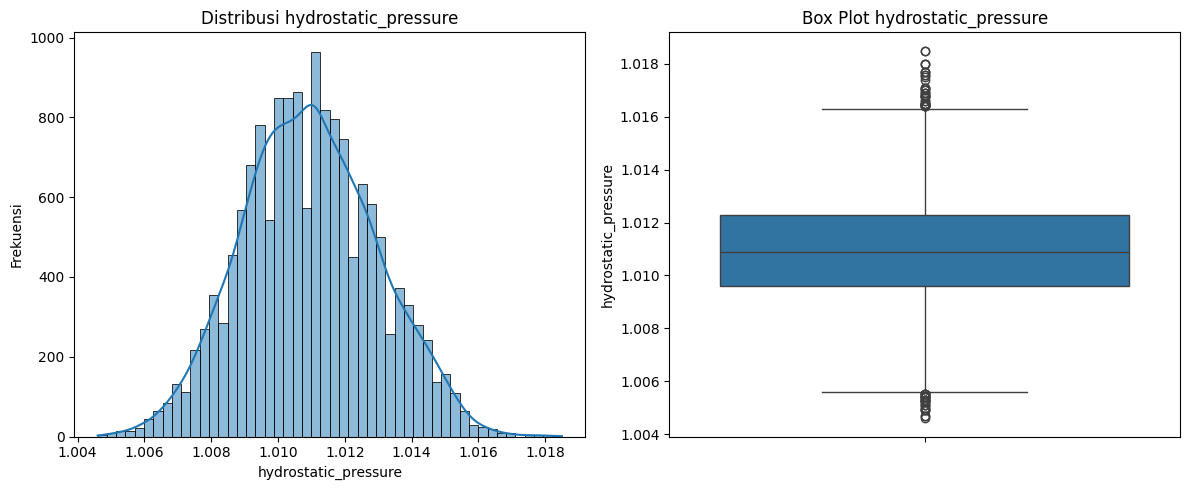


Skewness hydrostatic_pressure: 0.1013
Kurtosis hydrostatic_pressure: -0.2077
Jumlah nilai <= 0 di hydrostatic_pressure: 0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

target = 'hydrostatic_pressure'

print(f"\n--- Analisis Target Variable: {target} ---")

print("\nStatistik Deskriptif Target:")
print(train_df[target].describe())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_df[target], kde=True, bins=50)
plt.title(f'Distribusi {target}')
plt.xlabel(target)
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.boxplot(y=train_df[target])
plt.title(f'Box Plot {target}')
plt.ylabel(target)

plt.tight_layout()
plt.show()

print(f"\nSkewness {target}: {skew(train_df[target]):.4f}")
print(f"Kurtosis {target}: {kurtosis(train_df[target]):.4f}") 

print(f"Jumlah nilai <= 0 di {target}: {(train_df[target] <= 0).sum()}")

In [5]:
print("\n--- Pembersihan Tipe Data Kolom Object ---")

object_cols = train_df.select_dtypes(include='object').columns.tolist()
time_col = 'depth_reading_time'
if time_col in object_cols:
    object_cols.remove(time_col)

print(f"Kolom Object yang akan diperiksa/dikonversi (selain waktu): {object_cols}")

y_train_full = train_df[target].copy()
train_ids = train_df['measurement_id'].copy()
test_ids = test_df['measurement_id'].copy()

train_features = train_df.drop(columns=[target, 'measurement_id'])
test_features = test_df.drop(columns=['measurement_id']) 

ntrain = train_features.shape[0]
ntest = test_features.shape[0]

all_features = pd.concat((train_features, test_features), ignore_index=True)
print(f"\nUkuran data gabungan untuk preprocessing: {all_features.shape}")

cols_converted = []
cols_failed = []

for col in object_cols:
    try:
        
        if all_features[col].isnull().all():
             print(f"Kolom '{col}' hanya berisi NaN, dilewati.")
             continue
        all_features[col] = all_features[col].str.replace(' ', '', regex=False)
        all_features[col] = all_features[col].str.replace(',', '.', regex=False)
        all_features[col] = pd.to_numeric(all_features[col])
        cols_converted.append(col)
    except Exception as e:
        print(f"Gagal konversi kolom '{col}': {e}")
        cols_failed.append(col)

print(f"\nKolom berhasil dikonversi ke numerik: {cols_converted}")
if cols_failed:
    print(f"Kolom GAGAL dikonversi (perlu investigasi manual!): {cols_failed}")

print("\nInfo data gabungan setelah konversi tipe objek:")
all_features.info()


--- Pembersihan Tipe Data Kolom Object ---
Kolom Object yang akan diperiksa/dikonversi (selain waktu): ['oxygen_saturation_50m', 'perceived_water_density', 'sediment_deposition', 'dissolved_gas_pressure', 'current_turbulence', 'sediment_porosity_0_to_10cm', 'sediment_porosity_10_to_30cm', 'sediment_porosity_30_to_100cm', 'sediment_porosity_100_to_250cm', 'perpendicular_light_intensity', 'thermal_emissions']

Ukuran data gabungan untuk preprocessing: (21888, 51)

Kolom berhasil dikonversi ke numerik: ['oxygen_saturation_50m', 'perceived_water_density', 'sediment_deposition', 'dissolved_gas_pressure', 'current_turbulence', 'sediment_porosity_0_to_10cm', 'sediment_porosity_10_to_30cm', 'sediment_porosity_30_to_100cm', 'sediment_porosity_100_to_250cm', 'perpendicular_light_intensity', 'thermal_emissions']

Info data gabungan setelah konversi tipe objek:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21888 entries, 0 to 21887
Data columns (total 51 columns):
 #   Column                 

In [6]:
print(f"\n--- Parsing Fitur Waktu: {time_col} ---")

try:
    all_features[time_col] = pd.to_datetime(all_features[time_col])

    all_features['time_year'] = all_features[time_col].dt.year
    all_features['time_month'] = all_features[time_col].dt.month
    all_features['time_day'] = all_features[time_col].dt.day
    all_features['time_dayofweek'] = all_features[time_col].dt.dayofweek 
    all_features['time_dayofyear'] = all_features[time_col].dt.dayofyear
    all_features['time_hour'] = all_features[time_col].dt.hour
    all_features['time_minute'] = all_features[time_col].dt.minute 
    all_features['time_weekofyear'] = all_features[time_col].dt.isocalendar().week.astype(int)

    all_features['time_hour_sin'] = np.sin(2 * np.pi * all_features['time_hour']/24.0)
    all_features['time_hour_cos'] = np.cos(2 * np.pi * all_features['time_hour']/24.0)
    all_features['time_month_sin'] = np.sin(2 * np.pi * all_features['time_month']/12.0)
    all_features['time_month_cos'] = np.cos(2 * np.pi * all_features['time_month']/12.0)
    all_features['time_dayofweek_sin'] = np.sin(2 * np.pi * all_features['time_dayofweek']/7.0)
    all_features['time_dayofweek_cos'] = np.cos(2 * np.pi * all_features['time_dayofweek']/7.0)


    all_features = all_features.drop(columns=[time_col])
    print(f"Kolom '{time_col}' berhasil diparsing dan fitur waktu diekstrak.")
    print(f"Kolom baru terkait waktu: {[col for col in all_features.columns if col.startswith('time_')]}")

except Exception as e:
    print(f"Gagal parsing kolom waktu '{time_col}': {e}")



--- Parsing Fitur Waktu: depth_reading_time ---
Gagal parsing kolom waktu 'depth_reading_time': cannot convert NA to integer



--- Analisis Missing Values ---


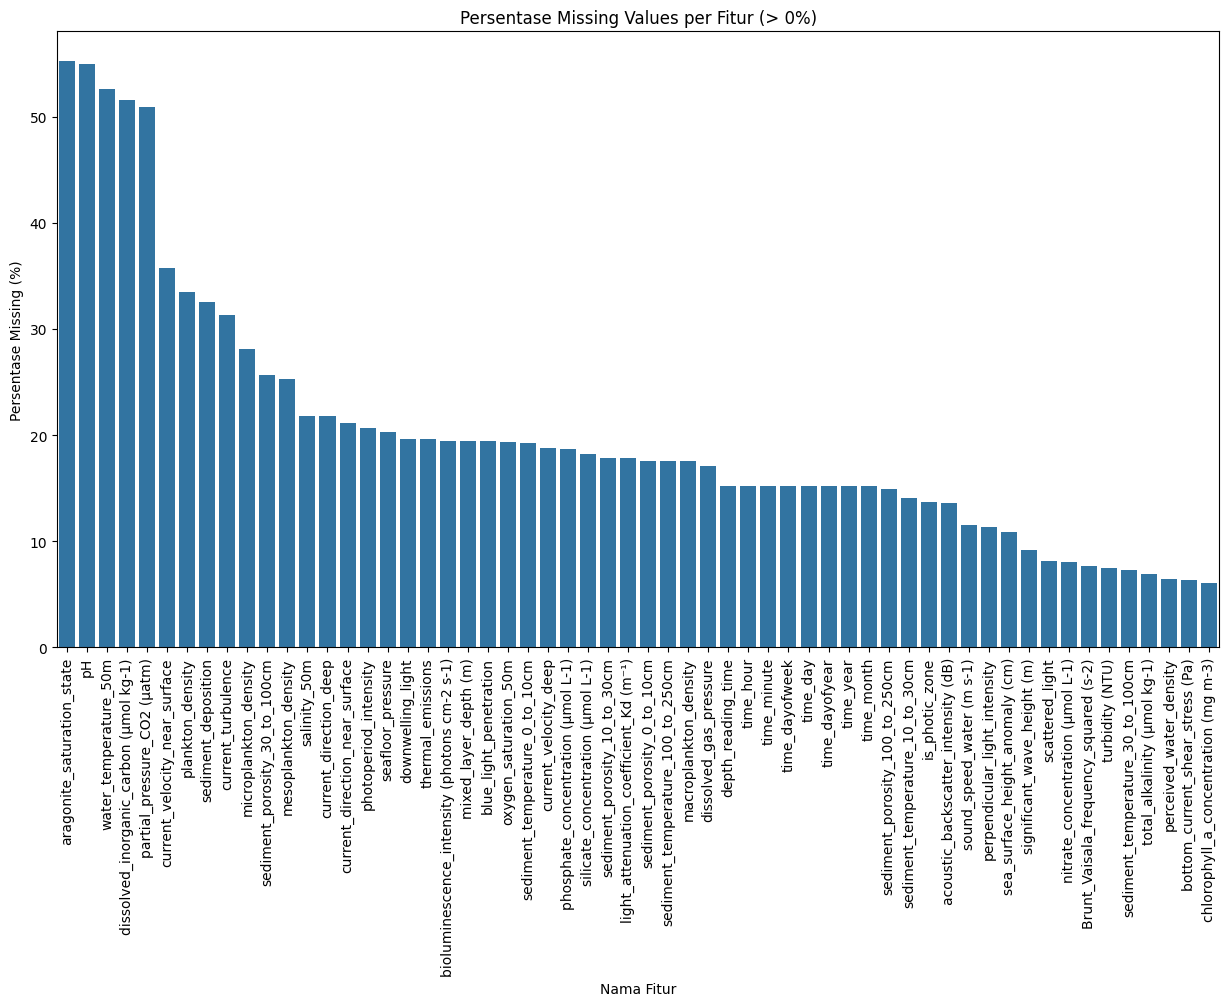


Fitur dengan Missing Values (diurutkan):
aragonite_saturation_state                      55.281433
pH                                              54.966192
water_temperature_50m                           52.599598
dissolved_inorganic_carbon (µmol kg-1)          51.589912
partial_pressure_CO2 (µatm)                     50.904605
current_velocity_near_surface                   35.759320
plankton_density                                33.516082
sediment_deposition                             32.579496
current_turbulence                              31.291118
microplankton_density                           28.106725
sediment_porosity_30_to_100cm                   25.639620
mesoplankton_density                            25.264985
salinity_50m                                    21.829313
current_direction_deep                          21.783626
current_direction_near_surface                  21.102887
photoperiod_intensity                           20.687135
seafloor_pressure             

In [7]:
print("\n--- Analisis Missing Values ---")

missing_percent = (all_features.isnull().sum() / len(all_features)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

if not missing_percent.empty:
    plt.figure(figsize=(15, 8))
    sns.barplot(x=missing_percent.index, y=missing_percent)
    plt.xticks(rotation=90)
    plt.title('Persentase Missing Values per Fitur (> 0%)')
    plt.xlabel('Nama Fitur')
    plt.ylabel('Persentase Missing (%)')
    plt.show()

    print("\nFitur dengan Missing Values (diurutkan):")
    print(missing_percent)

    high_missing_cols = missing_percent[missing_percent > 50].index.tolist()
    if high_missing_cols:
        print(f"\nPERHATIAN: Kolom dengan >50% missing values: {high_missing_cols}")

else:
    print("Tidak ada missing values ditemukan setelah langkah sebelumnya.")


--- Analisis Korelasi Fitur Numerik dengan Target ---

Korelasi Fitur Numerik dengan Target 'hydrostatic_pressure':
hydrostatic_pressure                      1.000000
seafloor_pressure                         0.995046
mixed_layer_depth (m)                     0.340242
nitrate_concentration (µmol L-1)          0.319174
phosphate_concentration (µmol L-1)        0.304428
silicate_concentration (µmol L-1)         0.276927
dissolved_inorganic_carbon (µmol kg-1)    0.247620
time_month                                0.241660
pH                                        0.239781
time_dayofyear                            0.238468
aragonite_saturation_state                0.218566
time_year                                 0.193644
microplankton_density                     0.047487
time_dayofweek                            0.011547
perpendicular_light_intensity             0.006441
Name: hydrostatic_pressure, dtype: float64
water_temperature_50m                    -0.275682
macroplankton_density   

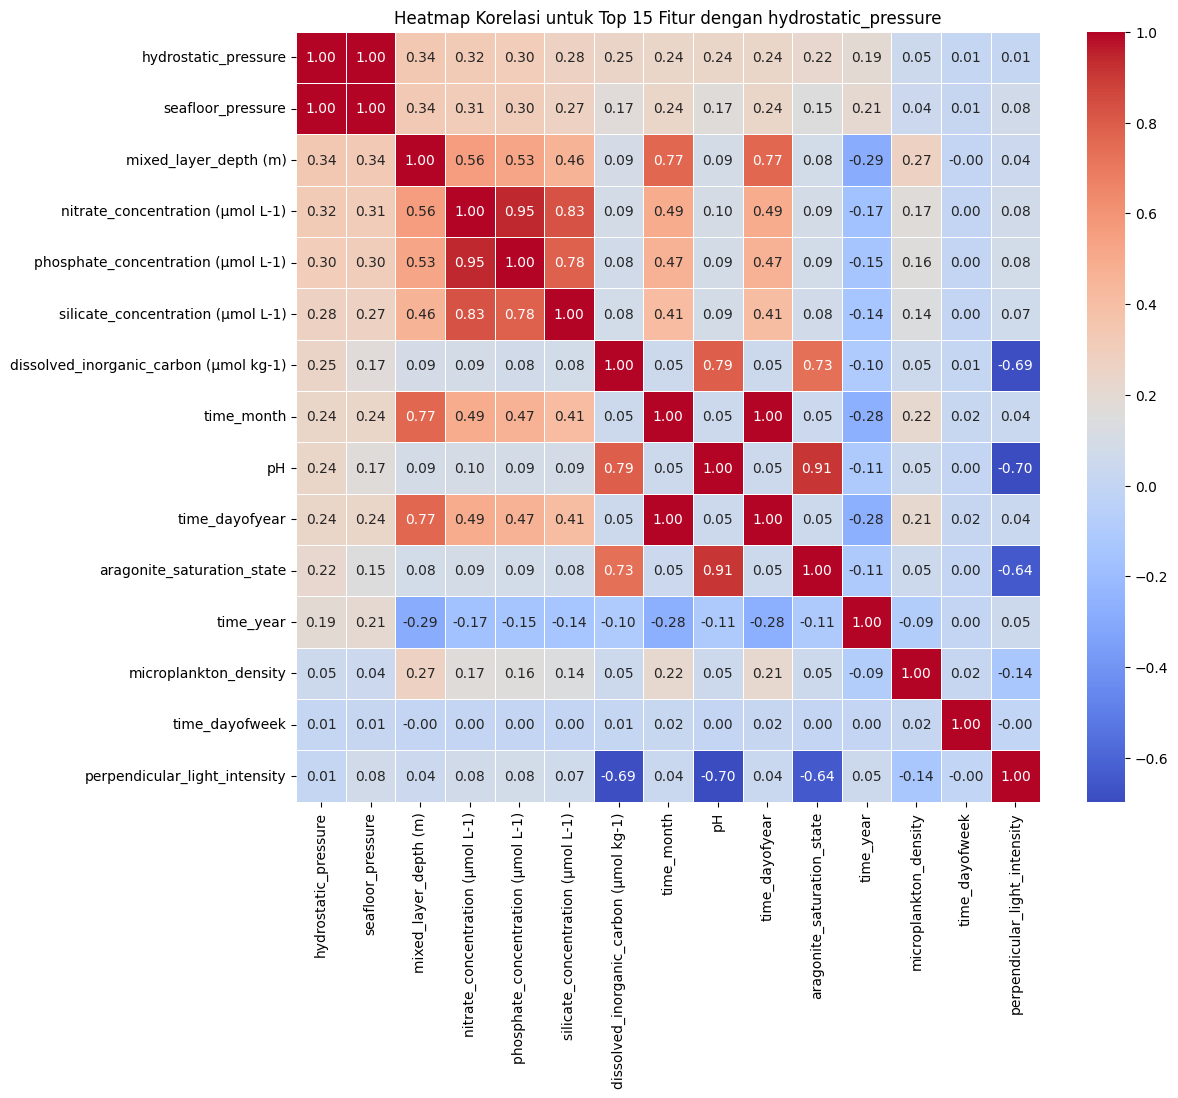

In [8]:
print("\n--- Analisis Korelasi Fitur Numerik dengan Target ---")

train_features_cleaned = all_features.iloc[:ntrain].copy()


train_for_corr = train_features_cleaned.copy()
train_for_corr[target] = y_train_full.values

numeric_cols = train_for_corr.select_dtypes(include=np.number).columns.tolist()
if target not in numeric_cols:
     print(f"Warning: Target '{target}' tidak terdeteksi sebagai numerik?")
     if target in train_for_corr.columns:
          numeric_cols.append(target)


correlation_matrix = train_for_corr[numeric_cols].corr()

corr_with_target = correlation_matrix[target].sort_values(ascending=False)

print(f"\nKorelasi Fitur Numerik dengan Target '{target}':")
print(corr_with_target.head(15)) 
print(corr_with_target.tail(15)) 

k = 15 
cols_for_heatmap = correlation_matrix.nlargest(k, target)[target].index
cm = np.corrcoef(train_for_corr[cols_for_heatmap].values.T) 

plt.figure(figsize=(12, 10))
sns.heatmap(train_for_corr[cols_for_heatmap].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title(f'Heatmap Korelasi untuk Top {k} Fitur dengan {target}')
plt.show()

In [9]:
print("\n--- Fase 3: Persiapan Data Final ---")
print(f"Bentuk data gabungan sebelum penghapusan kolom: {all_features.shape}")

cols_to_drop_high_missing = [
    'aragonite_saturation_state',
    'pH',
    'dissolved_inorganic_carbon (µmol kg-1)', 
    'partial_pressure_CO2 (µatm)',
    'water_temperature_50m'
]

existing_cols_to_drop = [col for col in cols_to_drop_high_missing if col in all_features.columns]

if existing_cols_to_drop:
    print(f"\nMenghapus kolom dengan >50% missing values: {existing_cols_to_drop}")
    all_features = all_features.drop(columns=existing_cols_to_drop)
    print(f"Bentuk data gabungan setelah penghapusan kolom missing tinggi: {all_features.shape}")
else:
    print("\nTidak ada kolom dengan missing tinggi untuk dihapus (mungkin nama berbeda atau sudah dihapus).")


--- Fase 3: Persiapan Data Final ---
Bentuk data gabungan sebelum penghapusan kolom: (21888, 58)

Menghapus kolom dengan >50% missing values: ['aragonite_saturation_state', 'pH', 'dissolved_inorganic_carbon (µmol kg-1)', 'partial_pressure_CO2 (µatm)', 'water_temperature_50m']
Bentuk data gabungan setelah penghapusan kolom missing tinggi: (21888, 53)


In [10]:
if 'measurement_id' in all_features.columns:
    print("\nMenghapus kolom 'measurement_id'...")
    all_features = all_features.drop(columns=['measurement_id'])
    print(f"Bentuk data gabungan setelah penghapusan ID: {all_features.shape}")

In [11]:
print("\n--- Membagi Kembali Data Menjadi Train & Test Final ---")

train_final = all_features.iloc[:ntrain].copy()
test_final = all_features.iloc[ntrain:].copy()

y_train = y_train_full.copy()

print(f"Bentuk data Train Final (Fitur): {train_final.shape}")
print(f"Bentuk data Test Final (Fitur): {test_final.shape}")
print(f"Bentuk data Target Train (y_train): {y_train.shape}")

assert ntrain == train_final.shape[0] == y_train.shape[0], "Jumlah baris data train tidak cocok!"
assert ntest == test_final.shape[0], "Jumlah baris data test tidak cocok!"

print("\nContoh Train Final:")
print(train_final.head())
print("\nContoh Test Final:")
print(test_final.head())
print("\nContoh Target Train:")
print(y_train.head())


--- Membagi Kembali Data Menjadi Train & Test Final ---
Bentuk data Train Final (Fitur): (15321, 53)
Bentuk data Test Final (Fitur): (6567, 53)
Bentuk data Target Train (y_train): (15321,)

Contoh Train Final:
   depth_reading_time  salinity_50m  oxygen_saturation_50m  \
0 2023-11-13 11:00:00          21.7                   22.6   
1                 NaT          20.2                   22.2   
2 2022-09-22 20:00:00          12.4                    NaN   
3                 NaT          25.6                    NaN   
4 2023-12-11 05:00:00          13.6                   21.5   

   perceived_water_density  sediment_deposition  seafloor_pressure  \
0                     36.7                  NaN                NaN   
1                     33.1                  0.1             0.9883   
2                     29.0                  0.1             0.9879   
3                     36.4                  NaN             0.9886   
4                     27.8                  NaN             0.9862

In [12]:
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import time 

print("\n--- Fase 4: Modeling & Evaluasi Baseline ---")

N_SPLITS = 5 
RANDOM_SEED = 42

kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_SEED)

print(f"Menggunakan K-Fold Cross-Validation dengan {N_SPLITS} splits.")


--- Fase 4: Modeling & Evaluasi Baseline ---
Menggunakan K-Fold Cross-Validation dengan 5 splits.


In [13]:

lgbm_params = {
    'objective': 'regression_l2',
    'metric': 'rmse',             
    'n_estimators': 1000,         
    'learning_rate': 0.05,        
    'feature_fraction': 0.8,      
    'bagging_fraction': 0.8,      
    'bagging_freq': 1,            
    'lambda_l1': 0.1,             
    'lambda_l2': 0.1,             
    'num_leaves': 31,            
    'verbose': -1,                
    'n_jobs': -1,                 
    'seed': RANDOM_SEED,
    'boosting_type': 'gbdt',
}

early_stopping_rounds = 50

print("\nModel baseline: LightGBM")
print("Parameter awal (belum di-tuning):")



Model baseline: LightGBM
Parameter awal (belum di-tuning):


In [14]:
oof_predictions = np.zeros(train_final.shape[0]) 
test_predictions = np.zeros(test_final.shape[0])  
feature_importance_df = pd.DataFrame()          
fold_scores = []                                
models = []                                     

X = train_final.copy()
y = y_train.copy()
X_test = test_final.copy()

print(f"\nMemulai pelatihan dengan {N_SPLITS}-Fold CV...")
start_time = time.time()


print("\n--- Pemeriksaan Tipe Data Final Sebelum Loop CV ---")

X = train_final.copy()
y = y_train.copy()
X_test = test_final.copy()

datetime_cols = X.select_dtypes(include=['datetime64[ns]']).columns
if not datetime_cols.empty:
    print(f"INFO: Menghapus kolom datetime lagi: {datetime_cols.tolist()}")
    X = X.drop(columns=datetime_cols)
    X_test = X_test.drop(columns=datetime_cols)

non_numeric_cols = X.select_dtypes(exclude=np.number).columns
if not non_numeric_cols.empty:
    print(f"\nERROR: Ditemukan kolom NON-NUMERIK yang tersisa di data fitur X:")
    print(X[non_numeric_cols].info()) 
    print(f"Menghapus kolom non-numerik ini: {non_numeric_cols.tolist()}")
    X = X.drop(columns=non_numeric_cols)
    if not X_test.empty: 
      cols_to_drop_in_test = [col for col in non_numeric_cols if col in X_test.columns]
      if cols_to_drop_in_test:
        X_test = X_test.drop(columns=cols_to_drop_in_test)

    print("\nVerifikasi tipe data X setelah penghapusan semua non-numerik:")
    print(X.info()) 
else:
    print("\nSemua kolom di X sudah numerik. Melanjutkan...")

oof_predictions = np.zeros(X.shape[0])
test_predictions = np.zeros(X_test.shape[0]) if not X_test.empty else np.array([])
feature_importance_df = pd.DataFrame()
fold_scores = []
models = []

print(f"\nMemulai pelatihan dengan {N_SPLITS}-Fold CV...")
start_time = time.time()

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"--- Fold {fold+1}/{N_SPLITS} ---")
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val = y.iloc[train_index], y.iloc[val_index]

    model = lgb.LGBMRegressor(**lgbm_params)
    try:
        model.fit(X_train, y_train_fold,
                  eval_set=[(X_val, y_val)],
                  eval_metric='rmse',
                  callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds, verbose=False)])

        val_preds = model.predict(X_val)
        oof_predictions[val_index] = val_preds
        fold_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
        fold_scores.append(fold_rmse)
        print(f"Fold {fold+1} RMSE: {fold_rmse:.6f}")

        if not X_test.empty:
            test_preds_fold = model.predict(X_test)
            test_predictions += test_preds_fold / N_SPLITS

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = X.columns 
        fold_importance_df["importance"] = model.feature_importances_
        fold_importance_df["fold"] = fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    except Exception as e:
        print(f"Error pada Fold {fold+1}: {e}")   
        print("Periksa tipe data X_train lagi:")
        print(X_train.info())
        break



for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"--- Fold {fold+1}/{N_SPLITS} ---")
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val = y.iloc[train_index], y.iloc[val_index]

    model = lgb.LGBMRegressor(**lgbm_params)
    model.fit(X_train, y_train_fold,
              eval_set=[(X_val, y_val)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds, verbose=False)]) 

    
    val_preds = model.predict(X_val)
    oof_predictions[val_index] = val_preds

    
    fold_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    fold_scores.append(fold_rmse)
    print(f"Fold {fold+1} RMSE: {fold_rmse:.6f}") 

    
    test_preds_fold = model.predict(X_test)
    test_predictions += test_preds_fold / N_SPLITS 

    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = X.columns
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["fold"] = fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    
mean_cv_rmse = np.mean(fold_scores)
std_cv_rmse = np.std(fold_scores)
total_time = time.time() - start_time

print(f"\n--- Hasil Validasi Silang ---")
print(f"Rata-rata RMSE CV: {mean_cv_rmse:.6f}")
print(f"Std Deviasi RMSE CV: {std_cv_rmse:.6f}")
print(f"Waktu Pelatihan Total: {total_time:.2f} detik")

oof_rmse_total = np.sqrt(mean_squared_error(y, oof_predictions))
print(f"RMSE OOF Keseluruhan: {oof_rmse_total:.6f}")


Memulai pelatihan dengan 5-Fold CV...

--- Pemeriksaan Tipe Data Final Sebelum Loop CV ---
INFO: Menghapus kolom datetime lagi: ['depth_reading_time']

Semua kolom di X sudah numerik. Melanjutkan...

Memulai pelatihan dengan 5-Fold CV...
--- Fold 1/5 ---
Fold 1 RMSE: 0.000592
--- Fold 2/5 ---
Fold 2 RMSE: 0.000613
--- Fold 3/5 ---
Fold 3 RMSE: 0.000589
--- Fold 4/5 ---
Fold 4 RMSE: 0.000599
--- Fold 5/5 ---
Fold 5 RMSE: 0.000598
--- Fold 1/5 ---
Fold 1 RMSE: 0.000592
--- Fold 2/5 ---
Fold 2 RMSE: 0.000613
--- Fold 3/5 ---
Fold 3 RMSE: 0.000589
--- Fold 4/5 ---
Fold 4 RMSE: 0.000599
--- Fold 5/5 ---
Fold 5 RMSE: 0.000598

--- Hasil Validasi Silang ---
Rata-rata RMSE CV: 0.000598
Std Deviasi RMSE CV: 0.000008
Waktu Pelatihan Total: 8.78 detik
RMSE OOF Keseluruhan: 0.000598



--- Analisis Feature Importance ---


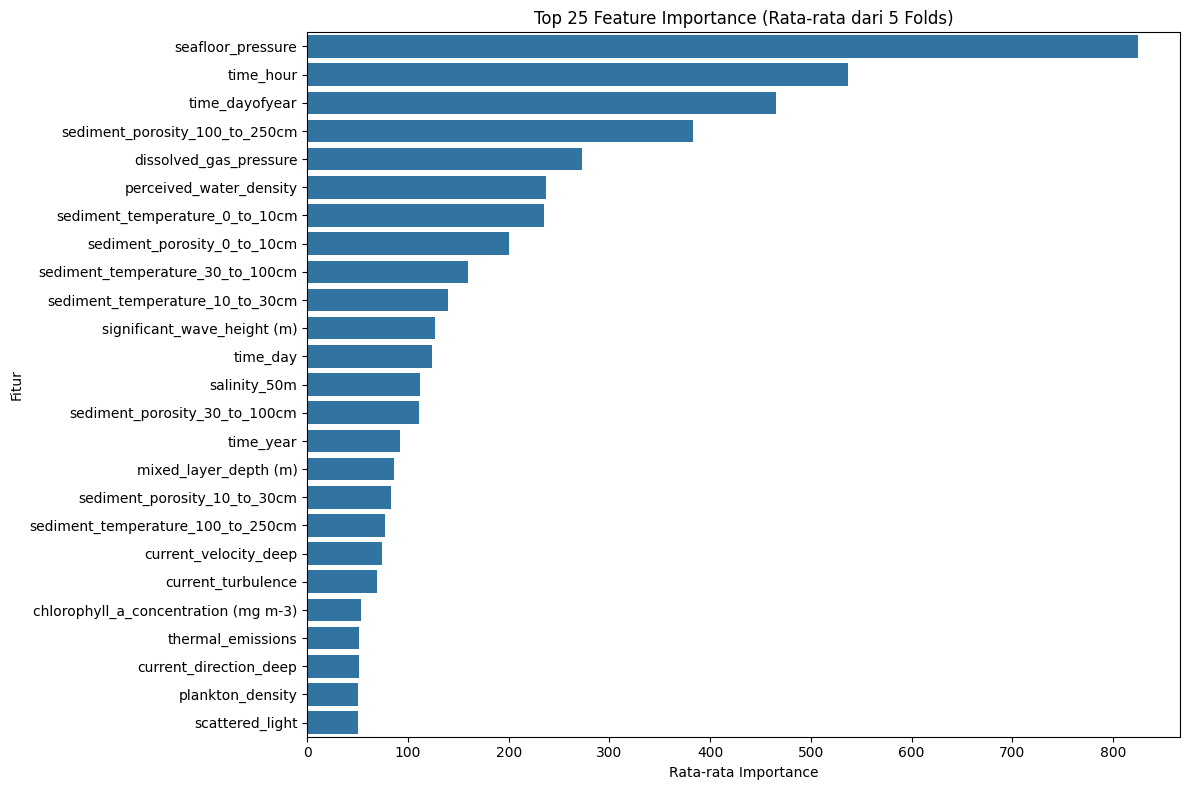


Top 25 Fitur berdasarkan Importance:
feature
seafloor_pressure                       825.2
time_hour                               536.6
time_dayofyear                          465.2
sediment_porosity_100_to_250cm          382.6
dissolved_gas_pressure                  272.4
perceived_water_density                 236.8
sediment_temperature_0_to_10cm          235.6
sediment_porosity_0_to_10cm             200.6
sediment_temperature_30_to_100cm        159.2
sediment_temperature_10_to_30cm         140.0
significant_wave_height (m)             127.4
time_day                                123.8
salinity_50m                            111.6
sediment_porosity_30_to_100cm           110.8
time_year                                92.6
mixed_layer_depth (m)                    86.2
sediment_porosity_10_to_30cm             83.4
sediment_temperature_100_to_250cm        77.6
current_velocity_deep                    74.2
current_turbulence                       69.8
chlorophyll_a_concentration (mg m-

In [15]:
print("\n--- Analisis Feature Importance ---")

mean_importance = feature_importance_df.groupby("feature")["importance"].mean().sort_values(ascending=False)

N_TOP_FEATURES = 25
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_importance.head(N_TOP_FEATURES).values,
            y=mean_importance.head(N_TOP_FEATURES).index)
plt.title(f'Top {N_TOP_FEATURES} Feature Importance (Rata-rata dari {N_SPLITS} Folds)')
plt.xlabel('Rata-rata Importance')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

print(f"\nTop {N_TOP_FEATURES} Fitur berdasarkan Importance:")
print(mean_importance.head(N_TOP_FEATURES))

In [16]:
import optuna
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import time

print("\n--- Fase 4.1: Hyperparameter Tuning dengan Optuna ---")

if 'X' not in locals() or 'y' not in locals():
     print("Variabel X atau y belum didefinisikan. Jalankan ulang persiapan data.")
     
     X = train_final.copy()
     y = y_train.copy()
     non_numeric_cols = X.select_dtypes(exclude=np.number).columns
     if not non_numeric_cols.empty:
         X = X.drop(columns=non_numeric_cols)


def objective(trial):
    lgbm_params = {
        'objective': 'regression_l2',
        'metric': 'rmse',
        'random_state': RANDOM_SEED, 
        'n_jobs': -1,
        'verbose': -1,
        'boosting_type': 'gbdt',

        'n_estimators': trial.suggest_int('n_estimators', 500, 3000, step=100), 
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True), 
        'num_leaves': trial.suggest_int('num_leaves', 10, 100), 
        'max_depth': trial.suggest_int('max_depth', 3, 12), 
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0), 
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10), 
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True), 
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True), 
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100), 
    }

    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_SEED)
    fold_scores = []
    early_stopping_rounds = 50 

    for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val = y.iloc[train_index], y.iloc[val_index]

        model = lgb.LGBMRegressor(**lgbm_params)
        model.fit(X_train, y_train_fold,
                  eval_set=[(X_val, y_val)],
                  eval_metric='rmse',
                  callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds, verbose=False)])

        val_preds = model.predict(X_val)
        fold_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
        fold_scores.append(fold_rmse)

       
        trial.report(fold_rmse, fold)
        if trial.should_prune():
            raise optuna.TrialPruned()

    return np.mean(fold_scores)

N_TRIALS = 50 
STUDY_NAME = 'lgbm_hydrostatic_tuning' 

try:
    study = optuna.load_study(study_name=STUDY_NAME, storage='sqlite:///optuna_studies.db')
    print(f"Memuat studi Optuna yang sudah ada: '{STUDY_NAME}'")
except KeyError:
    print(f"Membuat studi Optuna baru: '{STUDY_NAME}'")
    study = optuna.create_study(direction='minimize',
                                study_name=STUDY_NAME,
                                storage='sqlite:///optuna_studies.db', 
                                load_if_exists=True) 

print(f"Memulai optimasi dengan {N_TRIALS} trials...")
study.optimize(objective, n_trials=N_TRIALS, timeout=600) 

print("\n--- Hasil Tuning Optuna ---")
print(f"Jumlah trials selesai: {len(study.trials)}")
print(f"Trial terbaik:")
best_trial = study.best_trial
print(f"  Value (Min RMSE): {best_trial.value:.6f}")
print(f"  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

best_lgbm_params = lgbm_params.copy() 
best_lgbm_params.update(best_trial.params) 

print("\nParameter LGBM terbaik ditemukan:")



--- Fase 4.1: Hyperparameter Tuning dengan Optuna ---


/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Memuat studi Optuna yang sudah ada: 'lgbm_hydrostatic_tuning'
Memulai optimasi dengan 50 trials...


[I 2025-05-02 20:40:40,886] Trial 169 pruned. 
[I 2025-05-02 20:40:44,320] Trial 170 pruned. 
[I 2025-05-02 20:40:48,131] Trial 171 pruned. 
[I 2025-05-02 20:41:07,729] Trial 172 pruned. 
[I 2025-05-02 20:41:24,085] Trial 173 pruned. 
[I 2025-05-02 20:41:30,017] Trial 174 pruned. 
[I 2025-05-02 20:41:32,902] Trial 175 pruned. 
[I 2025-05-02 20:42:37,211] Trial 176 finished with value: 0.0004570831709198031 and parameters: {'n_estimators': 2600, 'learning_rate': 0.020977179480034427, 'num_leaves': 31, 'max_depth': 11, 'feature_fraction': 0.7480175255066639, 'bagging_fraction': 0.9120432000644401, 'bagging_freq': 2, 'lambda_l1': 2.1884649187893037e-06, 'lambda_l2': 0.03974967490853649, 'min_child_samples': 36}. Best is trial 176 with value: 0.0004570831709198031.
[I 2025-05-02 20:43:09,067] Trial 177 finished with value: 0.00046003570301844594 and parameters: {'n_estimators': 2600, 'learning_rate': 0.01625165105348977, 'num_leaves': 28, 'max_depth': 11, 'feature_fraction': 0.769557589506


--- Hasil Tuning Optuna ---
Jumlah trials selesai: 203
Trial terbaik:
  Value (Min RMSE): 0.000457
  Params: 
    n_estimators: 2600
    learning_rate: 0.022328274202769578
    num_leaves: 26
    max_depth: 11
    feature_fraction: 0.7965257603190962
    bagging_fraction: 0.8761638926991573
    bagging_freq: 2
    lambda_l1: 3.602490549548482e-06
    lambda_l2: 0.29189397641121634
    min_child_samples: 43

Parameter LGBM terbaik ditemukan:


In [17]:
print("\n--- Fase 4.2: Verifikasi CV dengan Parameter Terbaik ---")


final_lgbm_params = best_lgbm_params.copy()
final_lgbm_params['objective'] = 'regression_l2' 
final_lgbm_params['metric'] = 'rmse'         
final_lgbm_params['verbose'] = -1
final_lgbm_params['n_jobs'] = -1
final_lgbm_params['seed'] = RANDOM_SEED
final_lgbm_params['boosting_type'] = 'gbdt'



oof_predictions_final = np.zeros(X.shape[0])
test_predictions_final = np.zeros(X_test.shape[0]) if not X_test.empty else np.array([])
feature_importance_df_final = pd.DataFrame()
fold_scores_final = []
models_final = [] 

kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_SEED)
early_stopping_rounds = 50 

print(f"Memulai verifikasi dengan {N_SPLITS}-Fold CV menggunakan parameter terbaik...")
start_time_final = time.time()

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"--- Fold {fold+1}/{N_SPLITS} ---")
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val = y.iloc[train_index], y.iloc[val_index]

    model = lgb.LGBMRegressor(**final_lgbm_params)
    model.fit(X_train, y_train_fold,
              eval_set=[(X_val, y_val)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds, verbose=False)])

    val_preds = model.predict(X_val)
    oof_predictions_final[val_index] = val_preds
    fold_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    fold_scores_final.append(fold_rmse)
    print(f"Fold {fold+1} RMSE: {fold_rmse:.6f}")

    if not X_test.empty:
        test_preds_fold = model.predict(X_test)
        test_predictions_final += test_preds_fold / N_SPLITS

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = X.columns
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["fold"] = fold + 1
    feature_importance_df_final = pd.concat([feature_importance_df_final, fold_importance_df], axis=0)

mean_cv_rmse_final = np.mean(fold_scores_final)
std_cv_rmse_final = np.std(fold_scores_final)
oof_rmse_total_final = np.sqrt(mean_squared_error(y, oof_predictions_final))
total_time_final = time.time() - start_time_final

print(f"\n--- Hasil Verifikasi CV (Parameter Terbaik) ---")
print(f"Rata-rata RMSE CV: {mean_cv_rmse_final:.6f}")
print(f"Std Deviasi RMSE CV: {std_cv_rmse_final:.6f}")
print(f"RMSE OOF Keseluruhan: {oof_rmse_total_final:.6f}")
print(f"Waktu Pelatihan Total: {total_time_final:.2f} detik")



--- Fase 4.2: Verifikasi CV dengan Parameter Terbaik ---
Memulai verifikasi dengan 5-Fold CV menggunakan parameter terbaik...
--- Fold 1/5 ---
Fold 1 RMSE: 0.000457
--- Fold 2/5 ---
Fold 2 RMSE: 0.000465
--- Fold 3/5 ---
Fold 3 RMSE: 0.000445
--- Fold 4/5 ---
Fold 4 RMSE: 0.000455
--- Fold 5/5 ---
Fold 5 RMSE: 0.000462

--- Hasil Verifikasi CV (Parameter Terbaik) ---
Rata-rata RMSE CV: 0.000457
Std Deviasi RMSE CV: 0.000007
RMSE OOF Keseluruhan: 0.000457
Waktu Pelatihan Total: 20.09 detik


In [18]:
print("\n--- Fase 5: Melatih Model Final & Membuat Submission ---")

final_model = lgb.LGBMRegressor(**final_lgbm_params)

print("Melatih model final pada seluruh data training...")
start_time_final_train = time.time()
final_model.fit(X, y)
end_time_final_train = time.time()
print(f"Pelatihan model final selesai dalam {end_time_final_train - start_time_final_train:.2f} detik.")

print("Membuat prediksi pada data test...")
if not X_test.empty:
    final_test_predictions = final_model.predict(X_test)

    submission_df = pd.DataFrame({
        submission_id_col: test_ids, 
        submission_target_col: final_test_predictions
    })

    submission_filename = 'NDC_RR_blitzZnet_5.csv'
    submission_df.to_csv(submission_filename, index=False)
    print(f"\nFile submission '{submission_filename}' telah dibuat.")
    print(submission_df.head())

else:
    print("\nData test (X_test) kosong, tidak dapat membuat submission.")


--- Fase 5: Melatih Model Final & Membuat Submission ---
Melatih model final pada seluruh data training...
Pelatihan model final selesai dalam 5.36 detik.
Membuat prediksi pada data test...

File submission 'NDC_RR_blitzZnet_5.csv' telah dibuat.
   measurement_id  hydrostatic_pressure
0            7102              1.013133
1           14935              1.014814
2           16495              1.012897
3           10942              1.011604
4           12600              1.012353


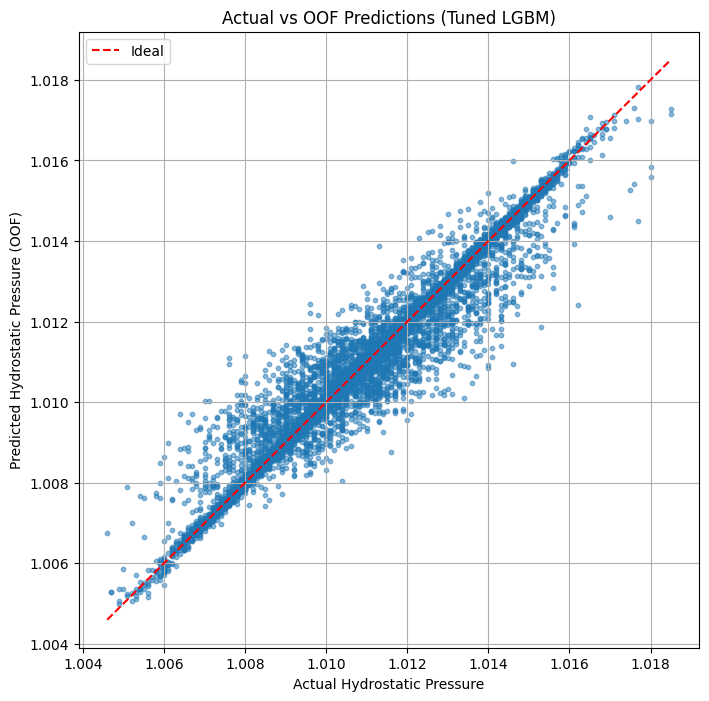

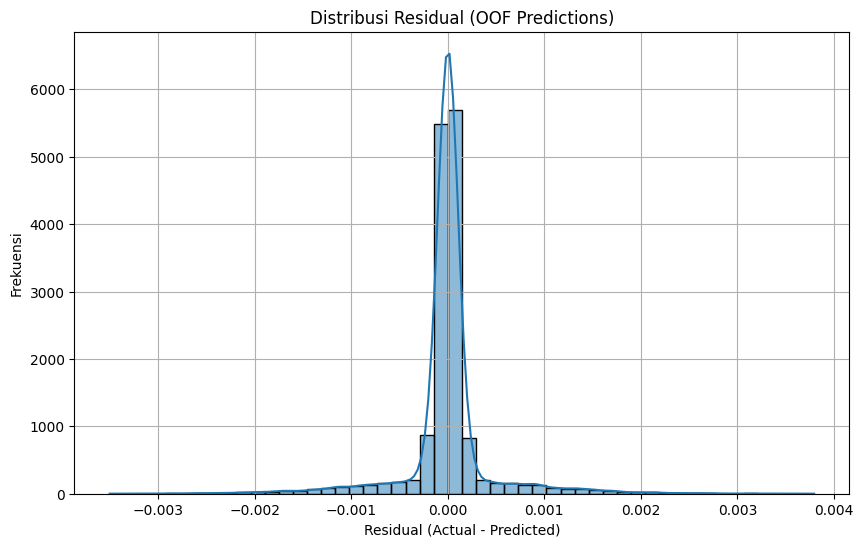

Mean Residual: 0.000002


In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(y_train, oof_predictions_final, alpha=0.5, s=10)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', label='Ideal')
plt.xlabel("Actual Hydrostatic Pressure")
plt.ylabel("Predicted Hydrostatic Pressure (OOF)")
plt.title("Actual vs OOF Predictions (Tuned LGBM)")
plt.grid(True)
plt.legend()
plt.show()

residuals = y_train - oof_predictions_final
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Residual (OOF Predictions)")
plt.grid(True)
plt.show()
print(f"Mean Residual: {residuals.mean():.6f}")  

In [28]:
# -*- coding: utf-8 -*-
"""
Kode Lengkap - Fase 4 & 5: Tuning & Submission CatBoost (CPU Based) - Versi Mandiri

Kode ini mencakup pemuatan data ulang dan preprocessing ringkas
untuk memastikan X, y, dan X_test siap digunakan,
lalu melakukan tuning CatBoost CPU dengan Optuna dan membuat submission.

Asumsi:
- Library (catboost, optuna, pandas, numpy, scikit-learn) terinstal.
- File train.csv, test.csv, sample_submission.csv ada di direktori kerja.
"""

import catboost as cb
import optuna
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import time
import os
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# --- 1. Konfigurasi Dasar ---
print("--- Konfigurasi ---")
TARGET_VARIABLE = 'hydrostatic_pressure'
ID_COLUMN = 'measurement_id'
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'
SUBMISSION_FILE = 'sample_submission.csv'
DB_FILENAME = 'optuna_studies.db'
FINAL_SUBMISSION_FILENAME_CB_CPU = 'submission_catboost_cpu_tuned_3.csv' # Nama file output

N_SPLITS = 5
RANDOM_SEED = 42
N_TRIALS_CATBOOST_CPU = 50 # Jumlah trial Optuna
OPTUNA_TIMEOUT = 720 # Timeout Optuna (detik, opsional)

print(f"Target: {TARGET_VARIABLE}, ID: {ID_COLUMN}")
print(f"CV Folds: {N_SPLITS}, Seed: {RANDOM_SEED}, Optuna Trials: {N_TRIALS_CATBOOST_CPU}")
print(f"CatBoost Version: {cb.__version__}")
print(f"Optuna Version: {optuna.__version__}")
print(f"Database Optuna: {DB_FILENAME}")


# --- 2. Pemuatan Ulang & Preprocessing Data (Versi Mandiri) ---
print("\n--- Memuat Ulang & Preprocessing Data ---")
try:
    # --- Pemuatan Data ---
    print("Memuat file data...")
    train_df_orig = pd.read_csv(TRAIN_FILE)
    test_df_orig = pd.read_csv(TEST_FILE)
    if TARGET_VARIABLE not in train_df_orig.columns: raise ValueError(f"Target '{TARGET_VARIABLE}' tidak ada di {TRAIN_FILE}")
    if ID_COLUMN not in test_df_orig.columns: raise ValueError(f"ID '{ID_COLUMN}' tidak ada di {TEST_FILE}")

    test_ids = test_df_orig[ID_COLUMN].copy() # Simpan ID Test

    # Hapus kolom hanya di test
    cols_only_in_test = set(test_df_orig.columns) - set(train_df_orig.columns)
    if cols_only_in_test:
        print(f"Menghapus kolom hanya di test: {cols_only_in_test}")
        test_df_orig = test_df_orig.drop(columns=list(cols_only_in_test))

    # --- Preprocessing ---
    print("Menjalankan preprocessing...")
    y_train_full = train_df_orig[TARGET_VARIABLE].copy()
    train_features = train_df_orig.drop(columns=[TARGET_VARIABLE, ID_COLUMN], errors='ignore')
    test_features = test_df_orig.drop(columns=[ID_COLUMN], errors='ignore')
    ntrain = train_features.shape[0]
    all_features = pd.concat((train_features, test_features), ignore_index=True)
    print(f"Data gabungan awal: {all_features.shape}")

    # Konversi Objek (Koma Desimal)
    object_cols = all_features.select_dtypes(include='object').columns.tolist()
    time_col = 'depth_reading_time'; converted_count = 0
    if time_col in object_cols: object_cols.remove(time_col)
    for col in object_cols:
        try:
            if not all_features[col].isnull().all():
                all_features[col] = all_features[col].str.replace(' ', '', regex=False).str.replace(',', '.', regex=False)
                all_features[col] = pd.to_numeric(all_features[col]); converted_count += 1
        except Exception: pass # Abaikan jika gagal konversi
    print(f"Kolom objek dikonversi ke numerik: {converted_count}")

    # Parsing Waktu
    try:
        if time_col in all_features.columns:
            print("Memparsing waktu...")
            all_features[time_col] = pd.to_datetime(all_features[time_col])
            all_features['time_year'] = all_features[time_col].dt.year
            all_features['time_month'] = all_features[time_col].dt.month
            all_features['time_day'] = all_features[time_col].dt.day
            all_features['time_dayofweek'] = all_features[time_col].dt.dayofweek
            all_features['time_dayofyear'] = all_features[time_col].dt.dayofyear
            all_features['time_hour'] = all_features[time_col].dt.hour
            all_features['time_hour_sin'] = np.sin(2 * np.pi * all_features['time_hour']/24.0)
            all_features['time_hour_cos'] = np.cos(2 * np.pi * all_features['time_hour']/24.0)
            all_features['time_month_sin'] = np.sin(2 * np.pi * all_features['time_month']/12.0)
            all_features['time_month_cos'] = np.cos(2 * np.pi * all_features['time_month']/12.0)
            all_features = all_features.drop(columns=[time_col])
    except Exception as e: print(f"Warn: Parsing waktu gagal saat muat ulang: {e}")

    # Hapus Kolom Missing Tinggi
    print("Menghapus kolom >50% missing...")
    cols_to_drop_high_missing = [
        'aragonite_saturation_state', 'pH', 'dissolved_inorganic_carbon (µmol kg-1)',
        'partial_pressure_CO2 (µatm)', 'water_temperature_50m'
    ]
    existing_cols_to_drop = [col for col in cols_to_drop_high_missing if col in all_features.columns]
    if existing_cols_to_drop:
        all_features = all_features.drop(columns=existing_cols_to_drop)
        print(f"Kolom dihapus: {existing_cols_to_drop}")

    # Hapus Semua Sisa Non-Numerik
    non_numeric_cols = all_features.select_dtypes(exclude=np.number).columns
    if not non_numeric_cols.empty:
        print(f"Menghapus sisa non-numerik: {non_numeric_cols.tolist()}")
        all_features = all_features.drop(columns=non_numeric_cols)

    # Pemisahan Final
    X = all_features.iloc[:ntrain].copy()
    X_test = all_features.iloc[ntrain:].copy()
    y = y_train_full.copy()

    print(f"Preprocessing Selesai - X: {X.shape}, y: {y.shape}, X_test: {X_test.shape}")
    if X.isnull().values.any(): print("Warning: Masih ada NaN di data fitur X. CatBoost akan menanganinya.")

except FileNotFoundError as e: exit(f"ERROR: File data tidak ditemukan - {e}")
except Exception as e: exit(f"ERROR tidak terduga saat memuat/memproses data: {e}")


# --- 3. Tuning Hyperparameter CatBoost (CPU) dengan Optuna ---

# 3.1 Fungsi Objective
def objective_catboost_cpu(trial):
    catboost_params = {
        'objective': 'RMSE', 'loss_function': 'RMSE', 'eval_metric': 'RMSE',
        # 'task_type': 'GPU', # Dihapus untuk CPU
        'iterations': trial.suggest_int('iterations', 500, 4000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'depth': trial.suggest_int('depth', 4, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-8, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'verbose': 0, 'random_seed': RANDOM_SEED, 'early_stopping_rounds': 50,
        'thread_count': -1 # Gunakan semua core CPU
    }
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_SEED)
    fold_scores = []
    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_tr, X_va = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_va = y.iloc[train_idx], y.iloc[val_idx]
        model = cb.CatBoostRegressor(**catboost_params)
        try: model.fit(X_tr, y_tr, eval_set=[(X_va, y_va)], verbose=0)
        except Exception as e: print(f"Error fit CB fold {fold+1}: {e}"); return float('inf')
        preds = model.predict(X_va); score = np.sqrt(mean_squared_error(y_va, preds)); fold_scores.append(score)
        trial.report(score, fold);
        if trial.should_prune(): raise optuna.TrialPruned()
    return np.mean(fold_scores)

# 3.2 Konfigurasi dan Eksekusi Studi
STUDY_NAME_CATBOOST_CPU = 'catboost_cpu_hydrostatic_tuning_final' # Nama studi
try:
    study_catboost_cpu = optuna.load_study(study_name=STUDY_NAME_CATBOOST_CPU, storage=f'sqlite:///{DB_FILENAME}')
    print(f"\nMemuat studi Optuna CatBoost CPU '{STUDY_NAME_CATBOOST_CPU}'")
    n_completed = len([t for t in study_catboost_cpu.trials if t.state == optuna.trial.TrialState.COMPLETE])
    remaining_trials = max(0, N_TRIALS_CATBOOST_CPU - n_completed)
    if remaining_trials == 0: print("Jumlah trials COMPLETE sudah tercapai."); N_TRIALS_TO_RUN = 0
    else: print(f"Akan menjalankan {remaining_trials} trial tambahan."); N_TRIALS_TO_RUN = remaining_trials
except KeyError:
    print(f"\nMembuat studi Optuna CatBoost CPU baru '{STUDY_NAME_CATBOOST_CPU}'")
    study_catboost_cpu = optuna.create_study(direction='minimize', study_name=STUDY_NAME_CATBOOST_CPU,
                                             storage=f'sqlite:///{DB_FILENAME}', load_if_exists=True)
    N_TRIALS_TO_RUN = N_TRIALS_CATBOOST_CPU

if N_TRIALS_TO_RUN > 0:
    print(f"\nMemulai optimasi CatBoost CPU dengan {N_TRIALS_TO_RUN} trials...")
    start_opt_time = time.time()
    study_catboost_cpu.optimize(objective_catboost_cpu, n_trials=N_TRIALS_TO_RUN, timeout=OPTUNA_TIMEOUT)
    end_opt_time = time.time()
    print(f"Optimasi CatBoost CPU selesai dalam {end_opt_time - start_opt_time:.2f} detik.")
else:
    print("\nTidak ada trial CatBoost CPU baru yang dijalankan.")

# 3.3 Menampilkan Hasil Terbaik
print("\n--- Hasil Tuning Optuna CatBoost (CPU) ---")
best_catboost_cpu_params = None
best_catboost_cpu_rmse = float('inf')
if len(study_catboost_cpu.trials) > 0:
    completed_trials_cb_cpu = [t for t in study_catboost_cpu.trials if t.state == optuna.trial.TrialState.COMPLETE]
    if completed_trials_cb_cpu:
        best_trial_catboost_cpu = study_catboost_cpu.best_trial
        best_catboost_cpu_rmse = best_trial_catboost_cpu.value
        print(f"Jumlah trials COMPLETE: {len(completed_trials_cb_cpu)}")
        print(f"Trial CatBoost CPU terbaik:")
        print(f"  Value (Min RMSE): {best_catboost_cpu_rmse:.6f}")
        print(f"  Params: ")
        for key, value in best_trial_catboost_cpu.params.items(): print(f"    {key}: {value}")
        best_catboost_cpu_params = {
            'objective': 'RMSE', 'loss_function': 'RMSE','eval_metric': 'RMSE',
            'verbose': 0, 'random_seed': RANDOM_SEED, 'thread_count': -1
        }
        best_catboost_cpu_params.update(best_trial_catboost_cpu.params)
        print("\nParameter CatBoost CPU terbaik disimpan ('best_catboost_cpu_params').")
    else: print("\nTidak ada trial Optuna CatBoost CPU yang berhasil COMPLETE.")
else: print("\nTidak ada trial Optuna CatBoost CPU yang pernah dijalankan.")


# --- 4. Pelatihan Model Final & Submission (Hanya CatBoost CPU) ---
if best_catboost_cpu_params is not None:
    print(f"\n--- Melatih Model Final CatBoost (CPU) ---")
    final_cb_params_no_es = best_catboost_cpu_params.copy()
    if 'early_stopping_rounds' in final_cb_params_no_es:
        del final_cb_params_no_es['early_stopping_rounds'] # Hapus ES untuk fit final

    final_catboost_model = cb.CatBoostRegressor(**final_cb_params_no_es)
    start_train_time = time.time()
    final_catboost_model.fit(X, y, verbose=0) # Latih pada data penuh
    end_train_time = time.time()
    print(f"Pelatihan model final selesai dalam {end_train_time - start_train_time:.2f} detik.")

    print("\nMembuat prediksi pada data test...")
    if not X_test.empty:
        final_test_predictions_cb = final_catboost_model.predict(X_test)
        print("Membuat file submission...")
        submission_df_cb = pd.DataFrame({ID_COLUMN: test_ids, TARGET_VARIABLE: final_test_predictions_cb})
        submission_df_cb.to_csv(FINAL_SUBMISSION_FILENAME_CB_CPU, index=False)
        print(f"\nFile submission '{FINAL_SUBMISSION_FILENAME_CB_CPU}' telah berhasil dibuat.")
        print("Contoh isi file submission:")
        print(submission_df_cb.head())
    else: print("\nData test kosong, submission tidak dibuat.")
else:
    print("\nTidak ada parameter CatBoost CPU terbaik yang valid. Tidak dapat melatih model final.")

print("\n--- Proses Selesai ---")

--- Konfigurasi ---
Target: hydrostatic_pressure, ID: measurement_id
CV Folds: 5, Seed: 42, Optuna Trials: 50
CatBoost Version: 1.2.8
Optuna Version: 4.3.0
Database Optuna: optuna_studies.db

--- Memuat Ulang & Preprocessing Data ---
Memuat file data...

Memuat studi Optuna CatBoost CPU 'catboost_cpu_hydrostatic_tuning_final'
Akan menjalankan 42 trial tambahan.

Memulai optimasi CatBoost CPU dengan 42 trials...


[I 2025-05-02 21:49:27,825] Trial 15 finished with value: 0.00048222115676695404 and parameters: {'iterations': 1500, 'learning_rate': 0.05538286658030319, 'depth': 5, 'l2_leaf_reg': 9.789144719580538, 'random_strength': 0.027368849652178336, 'bagging_temperature': 0.7209959319232518, 'border_count': 140}. Best is trial 9 with value: 0.0004721935618903118.
[I 2025-05-02 21:49:41,025] Trial 16 finished with value: 0.0004747922734810991 and parameters: {'iterations': 1400, 'learning_rate': 0.04133422955863371, 'depth': 6, 'l2_leaf_reg': 0.040575733196743416, 'random_strength': 0.02244559334147816, 'bagging_temperature': 0.7516434951751599, 'border_count': 140}. Best is trial 9 with value: 0.0004721935618903118.
[I 2025-05-02 21:49:57,943] Trial 17 finished with value: 0.00047988388033001945 and parameters: {'iterations': 1400, 'learning_rate': 0.06310896903271342, 'depth': 8, 'l2_leaf_reg': 4.4564132580339816e-05, 'random_strength': 0.23812910917958963, 'bagging_temperature': 0.991765822

Optimasi CatBoost CPU selesai dalam 417.95 detik.

--- Hasil Tuning Optuna CatBoost (CPU) ---
Jumlah trials COMPLETE: 23
Trial CatBoost CPU terbaik:
  Value (Min RMSE): 0.000472
  Params: 
    iterations: 2200
    learning_rate: 0.05466519506010132
    depth: 7
    l2_leaf_reg: 0.07294311475474108
    random_strength: 3.274267745449311e-05
    bagging_temperature: 0.6762706156513149
    border_count: 197

Parameter CatBoost CPU terbaik disimpan ('best_catboost_cpu_params').

--- Melatih Model Final CatBoost (CPU) ---
Pelatihan model final selesai dalam 8.72 detik.

Membuat prediksi pada data test...
Membuat file submission...

File submission 'submission_catboost_cpu_tuned_3.csv' telah berhasil dibuat.
Contoh isi file submission:
   measurement_id  hydrostatic_pressure
0            7102              1.013123
1           14935              1.014825
2           16495              1.012998
3           10942              1.011612
4           12600              1.012291

--- Proses Selesai 